Resources[200, 200, 200, 200, 200, 200, 200, 200, 200, 200]


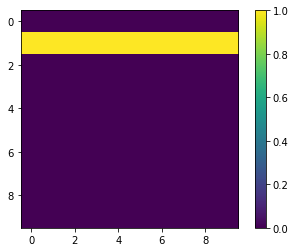

In [64]:
from mesa import Agent, Model
from mesa.space import MultiGrid
from mesa.time import SimultaneousActivation
import random
import numpy as np
import matplotlib.pyplot as plt

# R_in =
delta_t = 1
T = 100 #timesteps ##MatLap T_steps_end 
sizeOfFeild = 10 #currently same as time step
N = 1000 #numbe of agents ##MatLap N_agents
R_plus = 200
v = .04
Lambda = .00001
alpha = 0.0045
beta = 0.02
eta = 0.0036
theta = 0.14
gamma = 0.03
delta = 0.005

a = alpha
b = eta
r_fm = gamma
c = beta
d = theta
r_mf = delta
delta_x = v * delta_t

#Probability function of going from isFeeding -> ~isFeeding
def Kmf(r):
    y = b - (b - a) * np.exp(-r_fm * r)
    return y

#Probability function of going from ~isFeeding -> isFeeding
def Kfm(r):
    y =  (d - (d-c) * np.exp(-r_mf * r))
    return y

# Exp function of S to reduce R by. R(t+1) = R*R_exp(S)
def  updateResources(S):
    y = np.exp( -Lambda*S* delta_t/delta_x)
    return y

class LocustAgent(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.x = 0
        self.isFeeding =0

    def move(self):
        self.model.grid.move_agent(self, (self.x + 1,self.unique_id))

    def step(self):
        if self.isFeeding == 0:
            p = random.randint(0,1)
            Resource = Resources[self.x]
            if (p <= Kmf(Resource) * delta_t):
                self.isFeeding = 1
        else:
            p = random.randint(0,1)
            Resource = Resources[self.x]
            if (p <= Kfm(Resource) * delta_t):
                self.isFeeding = 0
        if(self.isFeeding == 1):
            if(self.x )
            self.move()
 
class LocustModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = SimultaneousActivation(self)
        self.resources = [R_plus] * width

        print("Resources" + str(self.resources))
        # Create agents
        for i in range(self.num_agents):
            a = LocustAgent(i, self)
            self.schedule.add(a)
            #print ("Hi, Iss am agent " + str(a.unique_id) +" at grid : (" + str(0) + "," + str(a.unique_id) +')')
            # Add the agent to a random grid cell
            self.grid.place_agent(a, (0, a.unique_id))

    def step(self):
        '''Advance the model by one step.'''
        self.schedule.step()

    def get_resource(self, index):
        return self.resources[index]

###############################################################
model = LocustModel(10, 10, 10)
Resources = [R_plus] * 10

for i in range(20):
    model.step()


agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation='nearest')
plt.colorbar()
# plt.show()